# Modelo simple de regresion

In [1]:
import pandas as pd
import numpy as np

In [3]:
X = pd.read_csv('./X.csv')
Y = X['worldwide_gross']

In [4]:
#se elimina porque no se puede ocupar para la prediccion
X = X.drop('worldwide_gross',axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=11)

In [26]:
print(len(X))
print(len(X_train))
print(len(X_test))

4385
2631
1754


In [27]:
X.head()

,production_budget,title_year,aspect_ratio,duration,budget,imdb_score,gross
0,425000000.0,2009.00000,1.780000,178.000000,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2002.41877,2.151445,107.628545,3.825188e+07,7.1,4.823375e+07
2,300000000.0,2007.00000,2.350000,169.000000,3.000000e+08,7.1,3.094042e+08
3,300000000.0,2015.00000,2.350000,148.000000,2.450000e+08,6.8,2.000742e+08
4,275000000.0,2012.00000,2.350000,164.000000,2.500000e+08,8.5,4.481306e+08


In [28]:
#se ocupara una regresion lasso
from sklearn.linear_model import Lasso

model = Lasso()

¿Por qué usar Lasoo?

El modelo Lasso se implementa cuando hay pocos features que se relacionen directamente con la variable a predecir. En este algoritmo se penaliza los features que aportan poca información volviéndolos cero, eliminando el ruido que producen en el modelo.

In [29]:
#entrenando el modelo con dataset train
model.fit(X_train,Y_train)

Lasso()

In [30]:
predicted = model.predict(X_test)
predicted

array([-5.90881888e+06,  7.29657471e+07,  4.04809187e+05, ...,
        2.50168164e+08,  1.48776691e+08,  7.43492682e+06])

In [31]:
predicted.shape

(1754,)

(array([[1.278e+03, 3.520e+02, 7.200e+01, 3.400e+01, 1.600e+01, 1.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [1.348e+03, 2.890e+02, 6.500e+01, 2.700e+01, 1.600e+01, 6.000e+00,
         1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]]),
 array([-1.06852072e+08,  1.09699358e+08,  3.26250787e+08,  5.42802217e+08,
         7.59353647e+08,  9.75905077e+08,  1.19245651e+09,  1.40900794e+09,
         1.62555937e+09,  1.84211080e+09,  2.05866222e+09]),
 <a list of 2 BarContainer objects>)

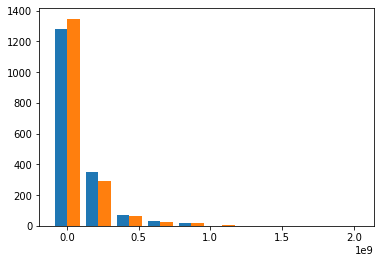

In [32]:
#visualizacion de datos
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted,Y_test])

# Evaluacion del comportamiento del modelo

Estimadores y las funciones de sklearn vienen con el maximo de argumentos con valores por defecto que suelen ser las mejores opciones si se tiene algun conocimiento particular del problema.


El "Score R2" deuna regresion es una de las formas mas comunes de entender su poder predictivo. Este *MIENTRAS MAS CERCA DE 1 ESTE, MEJOR ES*

Un Score R2 negativo es malo ya que solo indica que la regresion es peor que si simplemente se eligiera un valor fijo como prediccion para todos los puntos, la media.

In [33]:
model.score(X_test,Y_test)

0.7950884524851857

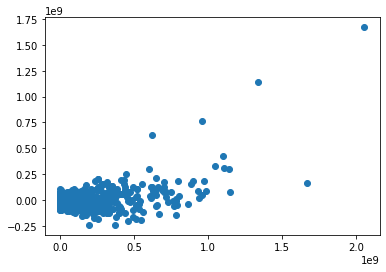

In [34]:
#residuales = diferencias entre la prediccion y el valor real
residuals =Y_test - predicted
plt.scatter(Y_test,residuals)

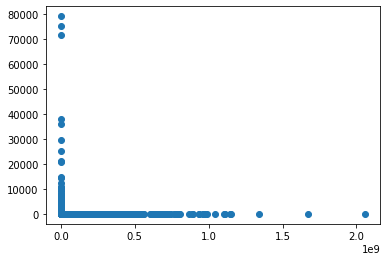

In [35]:
#errores de porcentaje
ap_residuals = np.abs(residuals)/Y_test
plt.scatter(Y_test,ap_residuals)

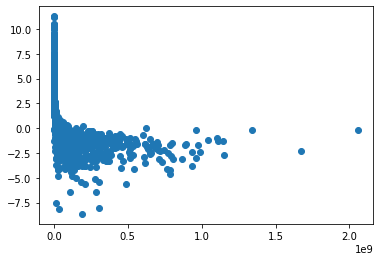

In [36]:
#escala logaritmica permite ver las cosas en orden de magnitud en lugar de forma absoluta 
lap_residuals = np.log(ap_residuals)
plt.scatter(Y_test,lap_residuals)

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

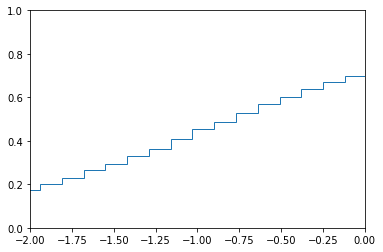

In [59]:
#graficar evaluacion numerica : funcion cumulativa de la distribucion de errores
plt.hist(lap_residuals, bins=100, range=(-10,3), density = 1, histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))